In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
import matplotlib 
font = {'size'   : 22}

matplotlib.rc('font', **font)

In [3]:
df = pd.read_csv('results.csv')
df.head()

,Unnamed: 0,vector_sum_numpy,c_cuda_vector_sum,vector_sum_one_thread_python,cpu_cython_vector_sum,c_cpu_vector_sum
0,0,0.000010,0.000354,0.000136,0.000008,0.000002
1,1,0.000010,0.000297,0.000253,0.000002,0.000003
2,2,0.000010,0.000479,0.000524,0.000003,0.000005
3,3,0.000011,0.000377,0.001092,0.000005,0.000010
4,4,0.000011,0.000433,0.002094,0.000013,0.000018


In [4]:
df.multiply(1000).round(3).to_csv('rounded_results.csv')

In [5]:
df = pd.read_csv('rounded_results.csv')
df = df.replace(0, np.NaN)
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
columns = df.columns
df.head()

,vector_sum_numpy,c_cuda_vector_sum,vector_sum_one_thread_python,cpu_cython_vector_sum,c_cpu_vector_sum
0,0.010,0.354,0.136,0.008,0.002
1,0.010,0.297,0.253,0.002,0.003
2,0.010,0.479,0.524,0.003,0.005
3,0.011,0.377,1.092,0.005,0.010
4,0.011,0.433,2.094,0.013,0.018


In [6]:
name2beauty_name = {
    'vector_sum_numpy': 'CPU Python numpy sum',
    'c_cuda_vector_sum': 'GPU Cython CUDA vector sum',
    'vector_sum_one_thread_python': 'CPU Python loops',
    'cpu_cython_vector_sum': 'CPU Cython vector sum',
    'c_cpu_vector_sum': 'CPU C via Cython call',
}

In [7]:
array_size = [i for i in range(8, 29)]

In [8]:
array_size

[8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [9]:
data = df.values
data

array([[1.000000e-02, 3.540000e-01, 1.360000e-01, 8.000000e-03,
        2.000000e-03],
       [1.000000e-02, 2.970000e-01, 2.530000e-01, 2.000000e-03,
        3.000000e-03],
       [1.000000e-02, 4.790000e-01, 5.240000e-01, 3.000000e-03,
        5.000000e-03],
       [1.100000e-02, 3.770000e-01, 1.092000e+00, 5.000000e-03,
        1.000000e-02],
       [1.100000e-02, 4.330000e-01, 2.094000e+00, 1.300000e-02,
        1.800000e-02],
       [1.300000e-02, 4.330000e-01, 4.178000e+00, 1.700000e-02,
        3.500000e-02],
       [1.700000e-02, 4.310000e-01, 8.486000e+00, 3.200000e-02,
        7.300000e-02],
       [2.400000e-02, 3.270000e-01, 1.681200e+01, 6.300000e-02,
        1.410000e-01],
       [3.500000e-02, 3.950000e-01, 3.357700e+01, 1.300000e-01,
        2.750000e-01],
       [6.200000e-02, 5.490000e-01, 6.691200e+01, 2.670000e-01,
        5.720000e-01],
       [1.090000e-01, 8.300000e-01, 1.375750e+02, 4.990000e-01,
        1.109000e+00],
       [2.060000e-01, 1.387000e+00, 2.69289

In [10]:
data[::, 1]

array([3.54000e-01, 2.97000e-01, 4.79000e-01, 3.77000e-01, 4.33000e-01,
       4.33000e-01, 4.31000e-01, 3.27000e-01, 3.95000e-01, 5.49000e-01,
       8.30000e-01, 1.38700e+00, 2.73900e+00, 4.94800e+00, 9.62900e+00,
       1.90550e+01, 3.83110e+01, 8.11060e+01, 1.55851e+02, 3.09741e+02,
       6.12665e+02])

In [16]:
def draw_plot(iterator, title):
    fig = plt.figure(figsize=(12, 12))
    for i in iterator:
        plt.plot(data[::, i], '-o', label=name2beauty_name[columns[i]])
    plt.title(title)
    plt.xlabel("Vector length power of 2")
    plt.ylabel("Time (ms.)")
    plt.xticks(np.arange(0, len(array_size)), array_size)

    plt.grid()
    plt.legend()
    
    fig.savefig(os.path.join('images', title.replace(' ', '') + '.svg'))

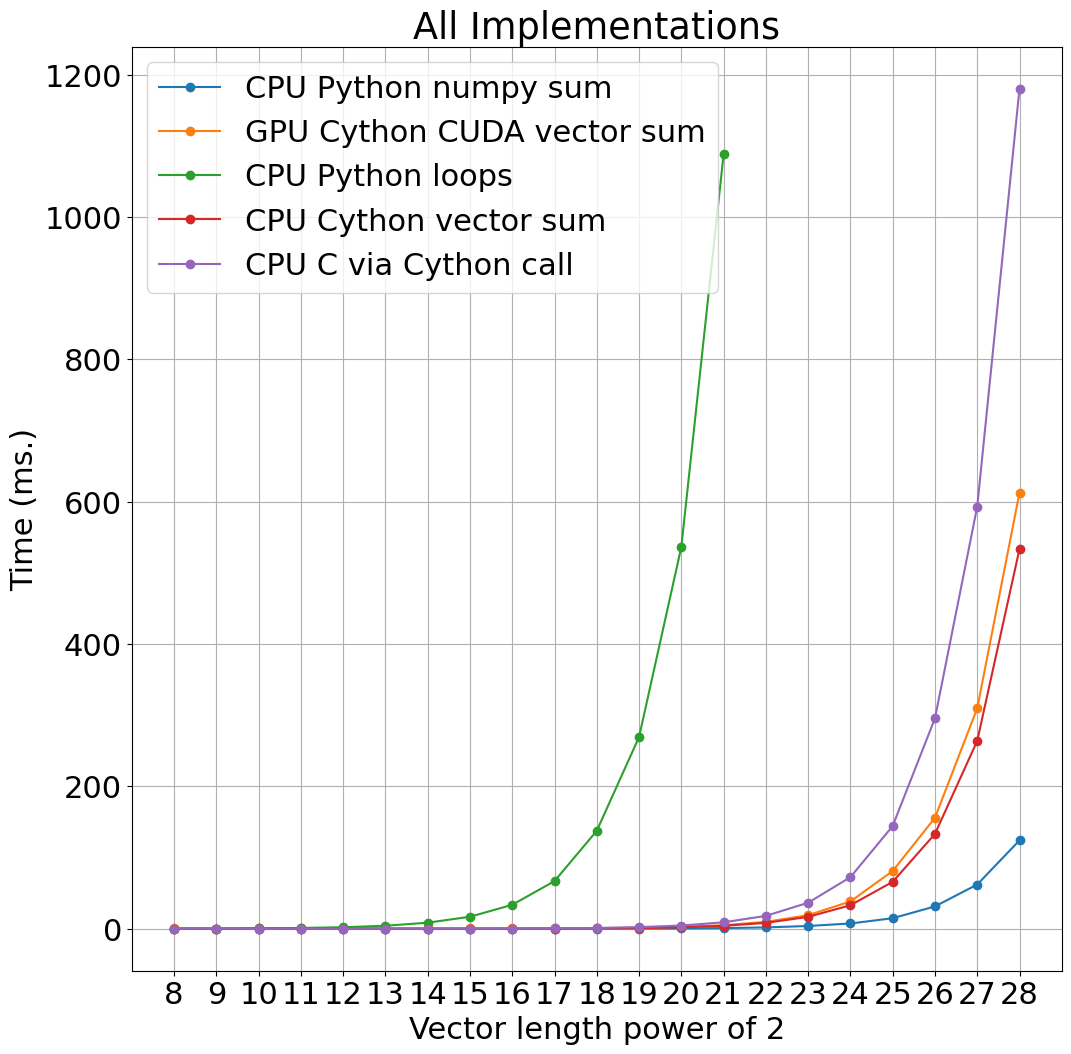

In [17]:
draw_plot(range(data.shape[1]), "All Implementations")

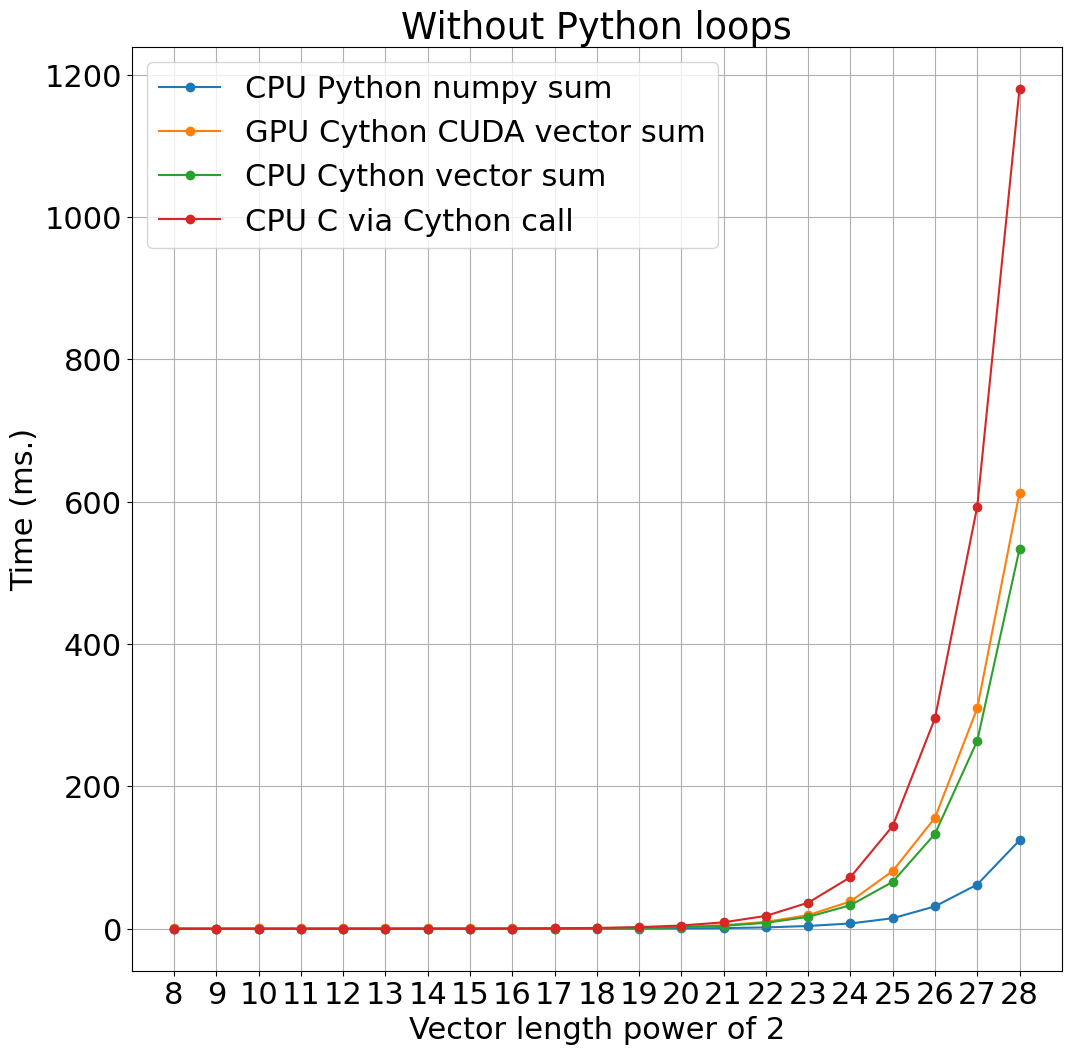

In [18]:
draw_plot([0, 1, 3, 4], "Without Python loops")

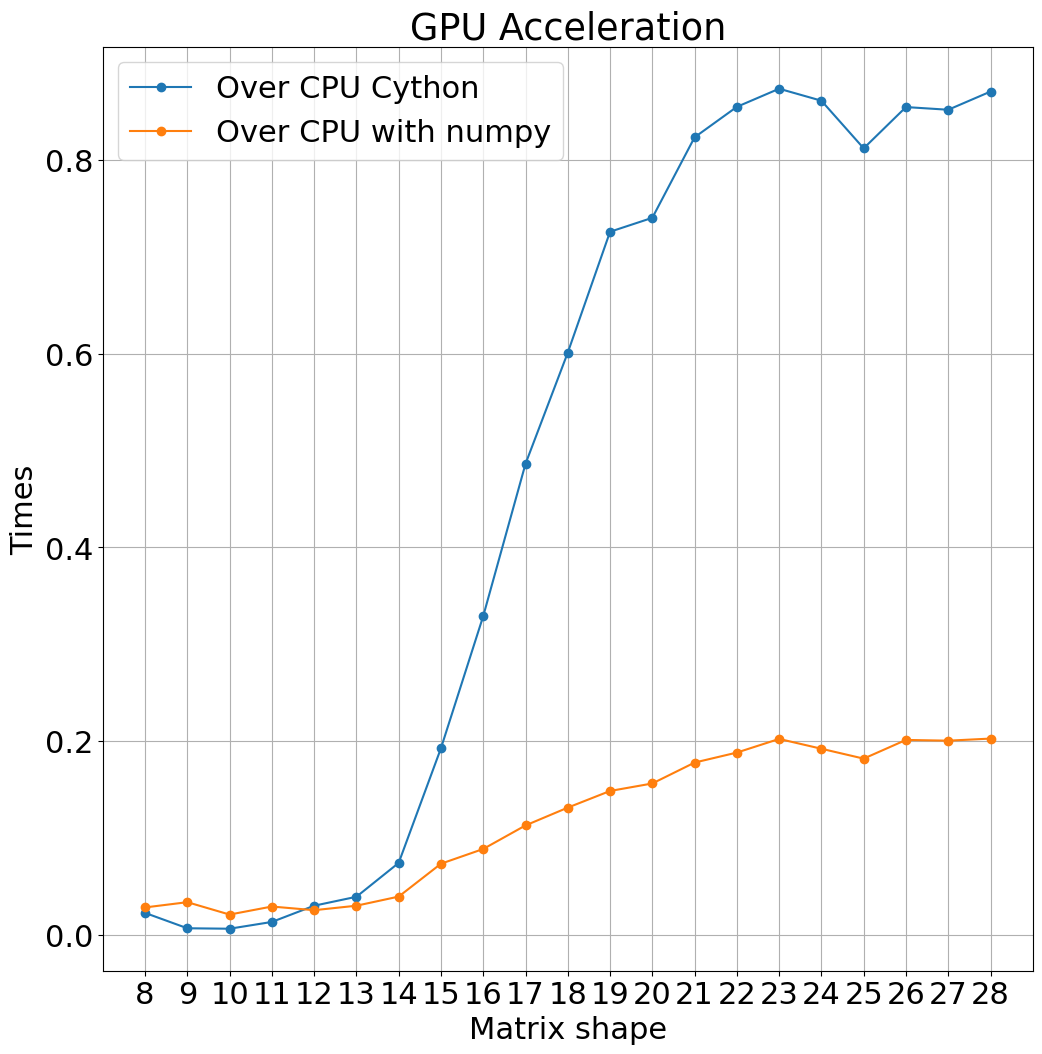

In [22]:
title = "GPU Acceleration"
fig = plt.figure(figsize=(12, 12))

plt.plot(np.arange(0, len(array_size)), data[::, 3] / data[::, 1], '-o')
plt.plot(np.arange(0, len(array_size)), data[::, 0] / data[::, 1], '-o')
    
plt.title(title)
plt.xlabel("Matrix shape")
plt.ylabel("Times")
plt.xticks(np.arange(0, len(array_size)), array_size)
plt.grid()

plt.legend(['Over CPU Cython', 'Over CPU with numpy'])

fig.savefig(os.path.join('images', title.replace(' ', '') + '.svg'))